In [1]:
# Importing Libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.decomposition import PCA
import numpy as np
from sklearn.model_selection import train_test_split,  GridSearchCV
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score,\
roc_auc_score, roc_curve, plot_roc_curve, auc, precision_recall_curve, confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
import warnings
warnings.filterwarnings("ignore")
from sklearn.exceptions import FitFailedWarning 
from sklearn.neighbors import LocalOutlierFactor
from sklearn.base import BaseEstimator
from scipy.spatial.distance import cdist

In [2]:
# Loading the Dataset
df = pd.read_csv('data.csv')
df.head()


id diagnosis  radius_mean  texture_mean  perimeter_mean  area_mean  \
0    842302         M        17.99         10.38          122.80     1001.0   
1    842517         M        20.57         17.77          132.90     1326.0   
2  84300903         M        19.69         21.25          130.00     1203.0   
3  84348301         M        11.42         20.38           77.58      386.1   
4  84358402         M        20.29         14.34          135.10     1297.0   

   smoothness_mean  compactness_mean  concavity_mean  concave points_mean  \
0          0.11840           0.27760          0.3001              0.14710   
1          0.08474           0.07864          0.0869              0.07017   
2          0.10960           0.15990          0.1974              0.12790   
3          0.14250           0.28390          0.2414              0.10520   
4          0.10030           0.13280          0.1980              0.10430   

   ...  texture_worst  perimeter_worst  area_worst  smoothness_worst  \
0  ...          17.33           184.60      2019.0            0.1622   
1  ...          23.41           158.80      1956.0            0.1238   
2  ...          25.53           152.50      1709.0            0.1444   
3  ...          26.50            98.87       567.7            0.2098   
4  ...          16.67           152.20      1575.0            0.1374   

   compactness_worst  concavity_worst  concave points_worst  symmetry_worst  \
0             0.6656           0.7119                0.2654          0.4601   
1             0.1866           0.2416                0.1860          0.2750   
2             0.4245           0.4504                0.2430          0.3613   
3             0.8663           0.6869                0.2575          0.6638   
4             0.2050           0.4000                0.1625          0.2364   

   fractal_dimension_worst  Unnamed: 32  
0                  0.11890          NaN  
1                  0.08902          NaN  
2                  0.08758          NaN  
3                  0.17300          NaN  
4                  0.07678          NaN  

[5 rows x 33 columns]

### EDA

In [3]:
df = df.drop(['Unnamed: 32','id'],axis = 1)  # Dropping unwanted columns
df.head()

diagnosis  radius_mean  texture_mean  perimeter_mean  area_mean  \
0         M        17.99         10.38          122.80     1001.0   
1         M        20.57         17.77          132.90     1326.0   
2         M        19.69         21.25          130.00     1203.0   
3         M        11.42         20.38           77.58      386.1   
4         M        20.29         14.34          135.10     1297.0   

   smoothness_mean  compactness_mean  concavity_mean  concave points_mean  \
0          0.11840           0.27760          0.3001              0.14710   
1          0.08474           0.07864          0.0869              0.07017   
2          0.10960           0.15990          0.1974              0.12790   
3          0.14250           0.28390          0.2414              0.10520   
4          0.10030           0.13280          0.1980              0.10430   

   symmetry_mean  ...  radius_worst  texture_worst  perimeter_worst  \
0         0.2419  ...         25.38          17.33           184.60   
1         0.1812  ...         24.99          23.41           158.80   
2         0.2069  ...         23.57          25.53           152.50   
3         0.2597  ...         14.91          26.50            98.87   
4         0.1809  ...         22.54          16.67           152.20   

   area_worst  smoothness_worst  compactness_worst  concavity_worst  \
0      2019.0            0.1622             0.6656           0.7119   
1      1956.0            0.1238             0.1866           0.2416   
2      1709.0            0.1444             0.4245           0.4504   
3       567.7            0.2098             0.8663           0.6869   
4      1575.0            0.1374             0.2050           0.4000   

   concave points_worst  symmetry_worst  fractal_dimension_worst  
0                0.2654          0.4601                  0.11890  
1                0.1860          0.2750                  0.08902  
2                0.2430          0.3613                  0.08758  
3                0.2575          0.6638                  0.17300  
4                0.1625          0.2364                  0.07678  

[5 rows x 31 columns]

In [4]:
# Checking for NaN values
df.isna().sum()

diagnosis                  0
radius_mean                0
texture_mean               0
perimeter_mean             0
area_mean                  0
smoothness_mean            0
compactness_mean           0
concavity_mean             0
concave points_mean        0
symmetry_mean              0
fractal_dimension_mean     0
radius_se                  0
texture_se                 0
perimeter_se               0
area_se                    0
smoothness_se              0
compactness_se             0
concavity_se               0
concave points_se          0
symmetry_se                0
fractal_dimension_se       0
radius_worst               0
texture_worst              0
perimeter_worst            0
area_worst                 0
smoothness_worst           0
compactness_worst          0
concavity_worst            0
concave points_worst       0
symmetry_worst             0
fractal_dimension_worst    0
dtype: int64

In [5]:
# Checking for Null Values
df.isnull().sum()

diagnosis                  0
radius_mean                0
texture_mean               0
perimeter_mean             0
area_mean                  0
smoothness_mean            0
compactness_mean           0
concavity_mean             0
concave points_mean        0
symmetry_mean              0
fractal_dimension_mean     0
radius_se                  0
texture_se                 0
perimeter_se               0
area_se                    0
smoothness_se              0
compactness_se             0
concavity_se               0
concave points_se          0
symmetry_se                0
fractal_dimension_se       0
radius_worst               0
texture_worst              0
perimeter_worst            0
area_worst                 0
smoothness_worst           0
compactness_worst          0
concavity_worst            0
concave points_worst       0
symmetry_worst             0
fractal_dimension_worst    0
dtype: int64

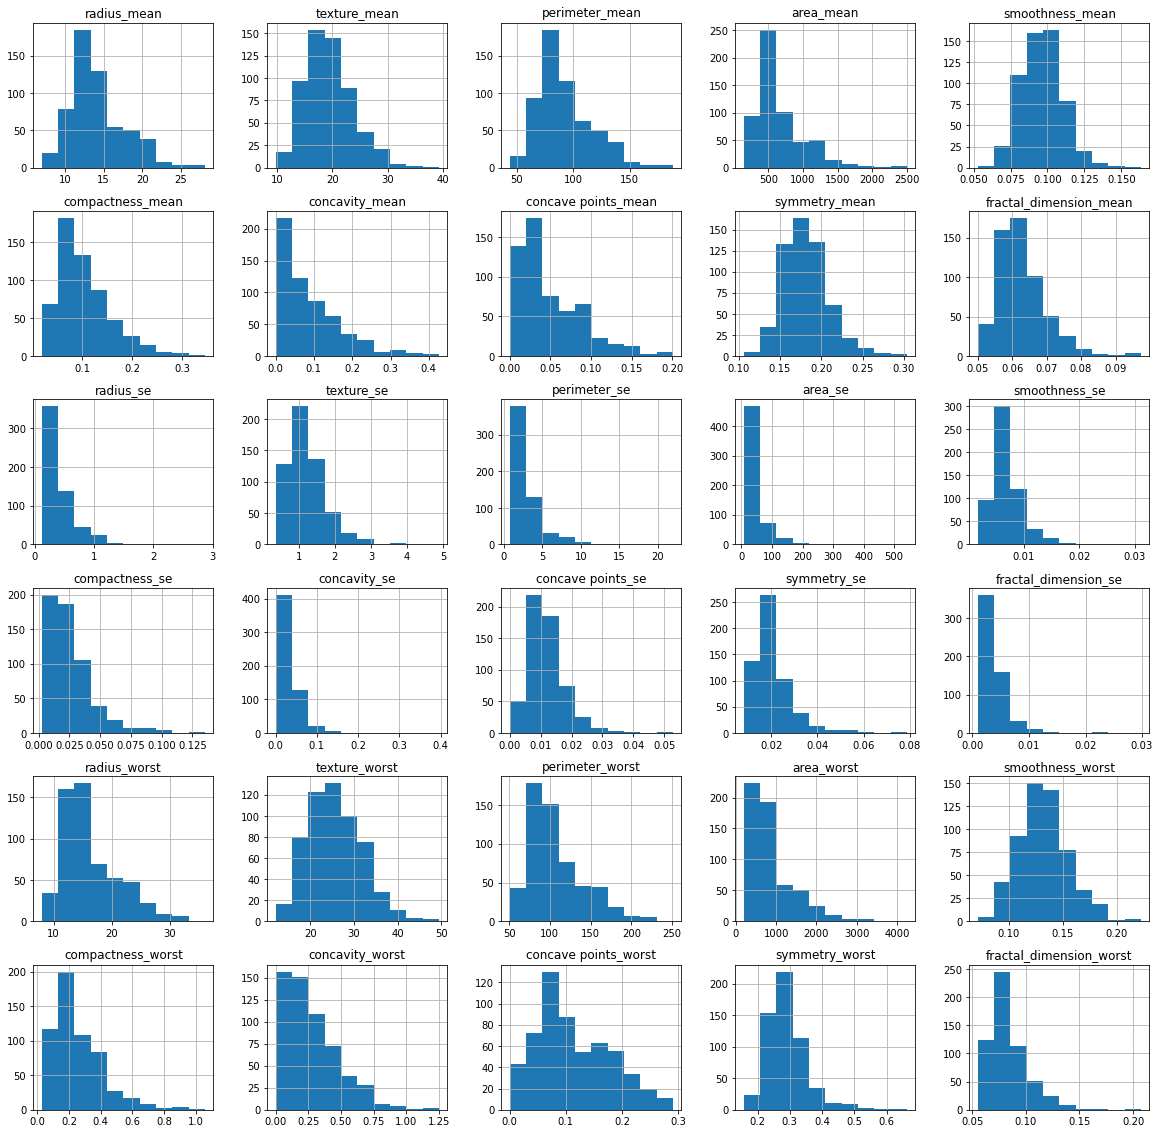

In [6]:
# Plotting a Histogram for all Columns
df.hist(figsize=(20,20))
plt.show()


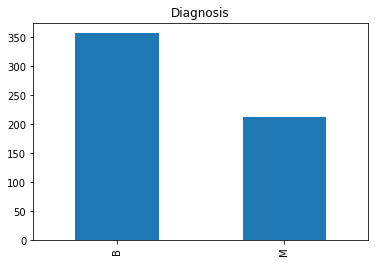

In [7]:
# Plotting the Diagnosis Column
df['diagnosis'].value_counts().plot(kind='bar')
plt.title('Diagnosis')
plt.show()

### Outlier Detection

In [8]:

class DistanceOutliers(BaseEstimator):
    def __init__(self, metric='euclidean', percentile=90):
        self.metric = metric
        self.percentile = percentile
        
        
    def fit(self, X):
        self.centroid = np.mean(X, axis=0).values.reshape(-1, 1).T
        distances_train = cdist(self.centroid, X, metric=self.metric).reshape(-1)
        self.threshold = np.percentile(distances_train, self.percentile)
        
        
    def predict(self, X):
        distances = cdist(self.centroid, X, metric=self.metric).reshape(-1)
        predictions = (distances > self.threshold).astype(int)
        return predictions

In [9]:
std=StandardScaler() # For standardization
df.iloc[:,1:] = std.fit_transform(df.iloc[:,1:])

euclidean_model = DistanceOutliers(metric='euclidean', percentile=90)
euclidean_model.fit(df.iloc[:,1:])

euclidean_outliers = euclidean_model.predict(df.iloc[:,1:])

In [10]:
se =  [col for col in df.columns if col.endswith('_se')]
means = [col for col in df.columns if col.endswith('_mean')]
worst =  [col for col in df.columns if col.endswith('_worst')]
se.append('is_outlier')
means.append('is_outlier')
worst.append('is_outlier')

df_new = df.copy()
df_new['is_outlier']=euclidean_outliers

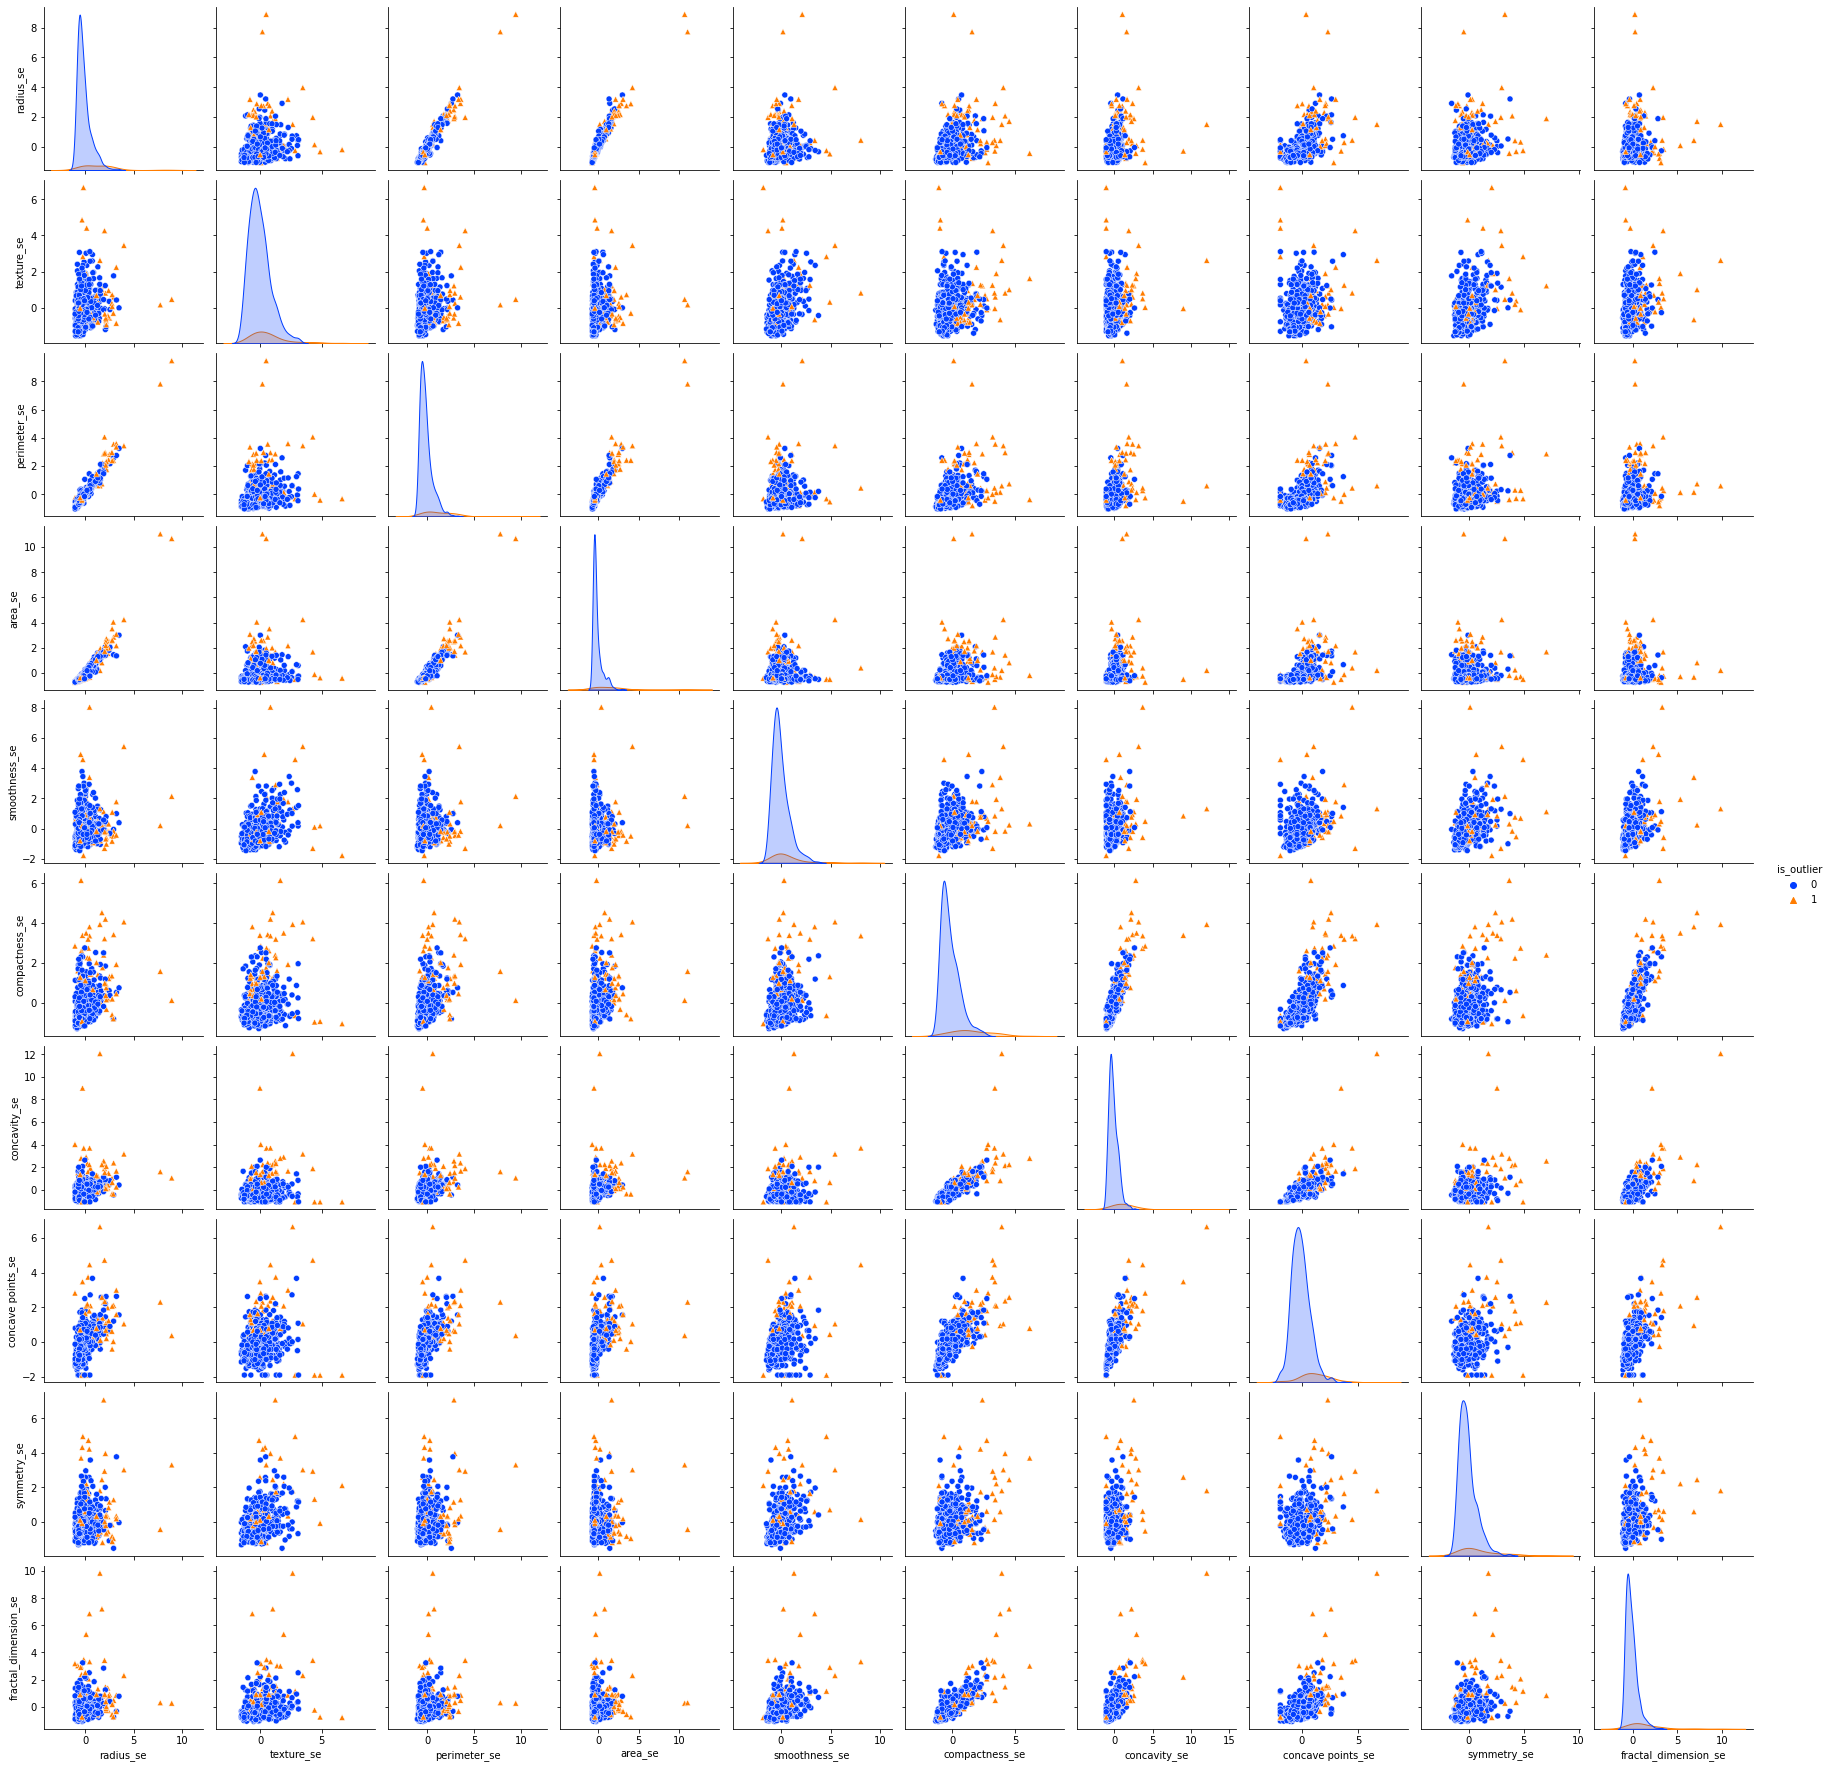

In [11]:
sns.pairplot(data=df_new[se], hue='is_outlier', hue_order=[0, 1], markers=['o', '^'], palette='bright')


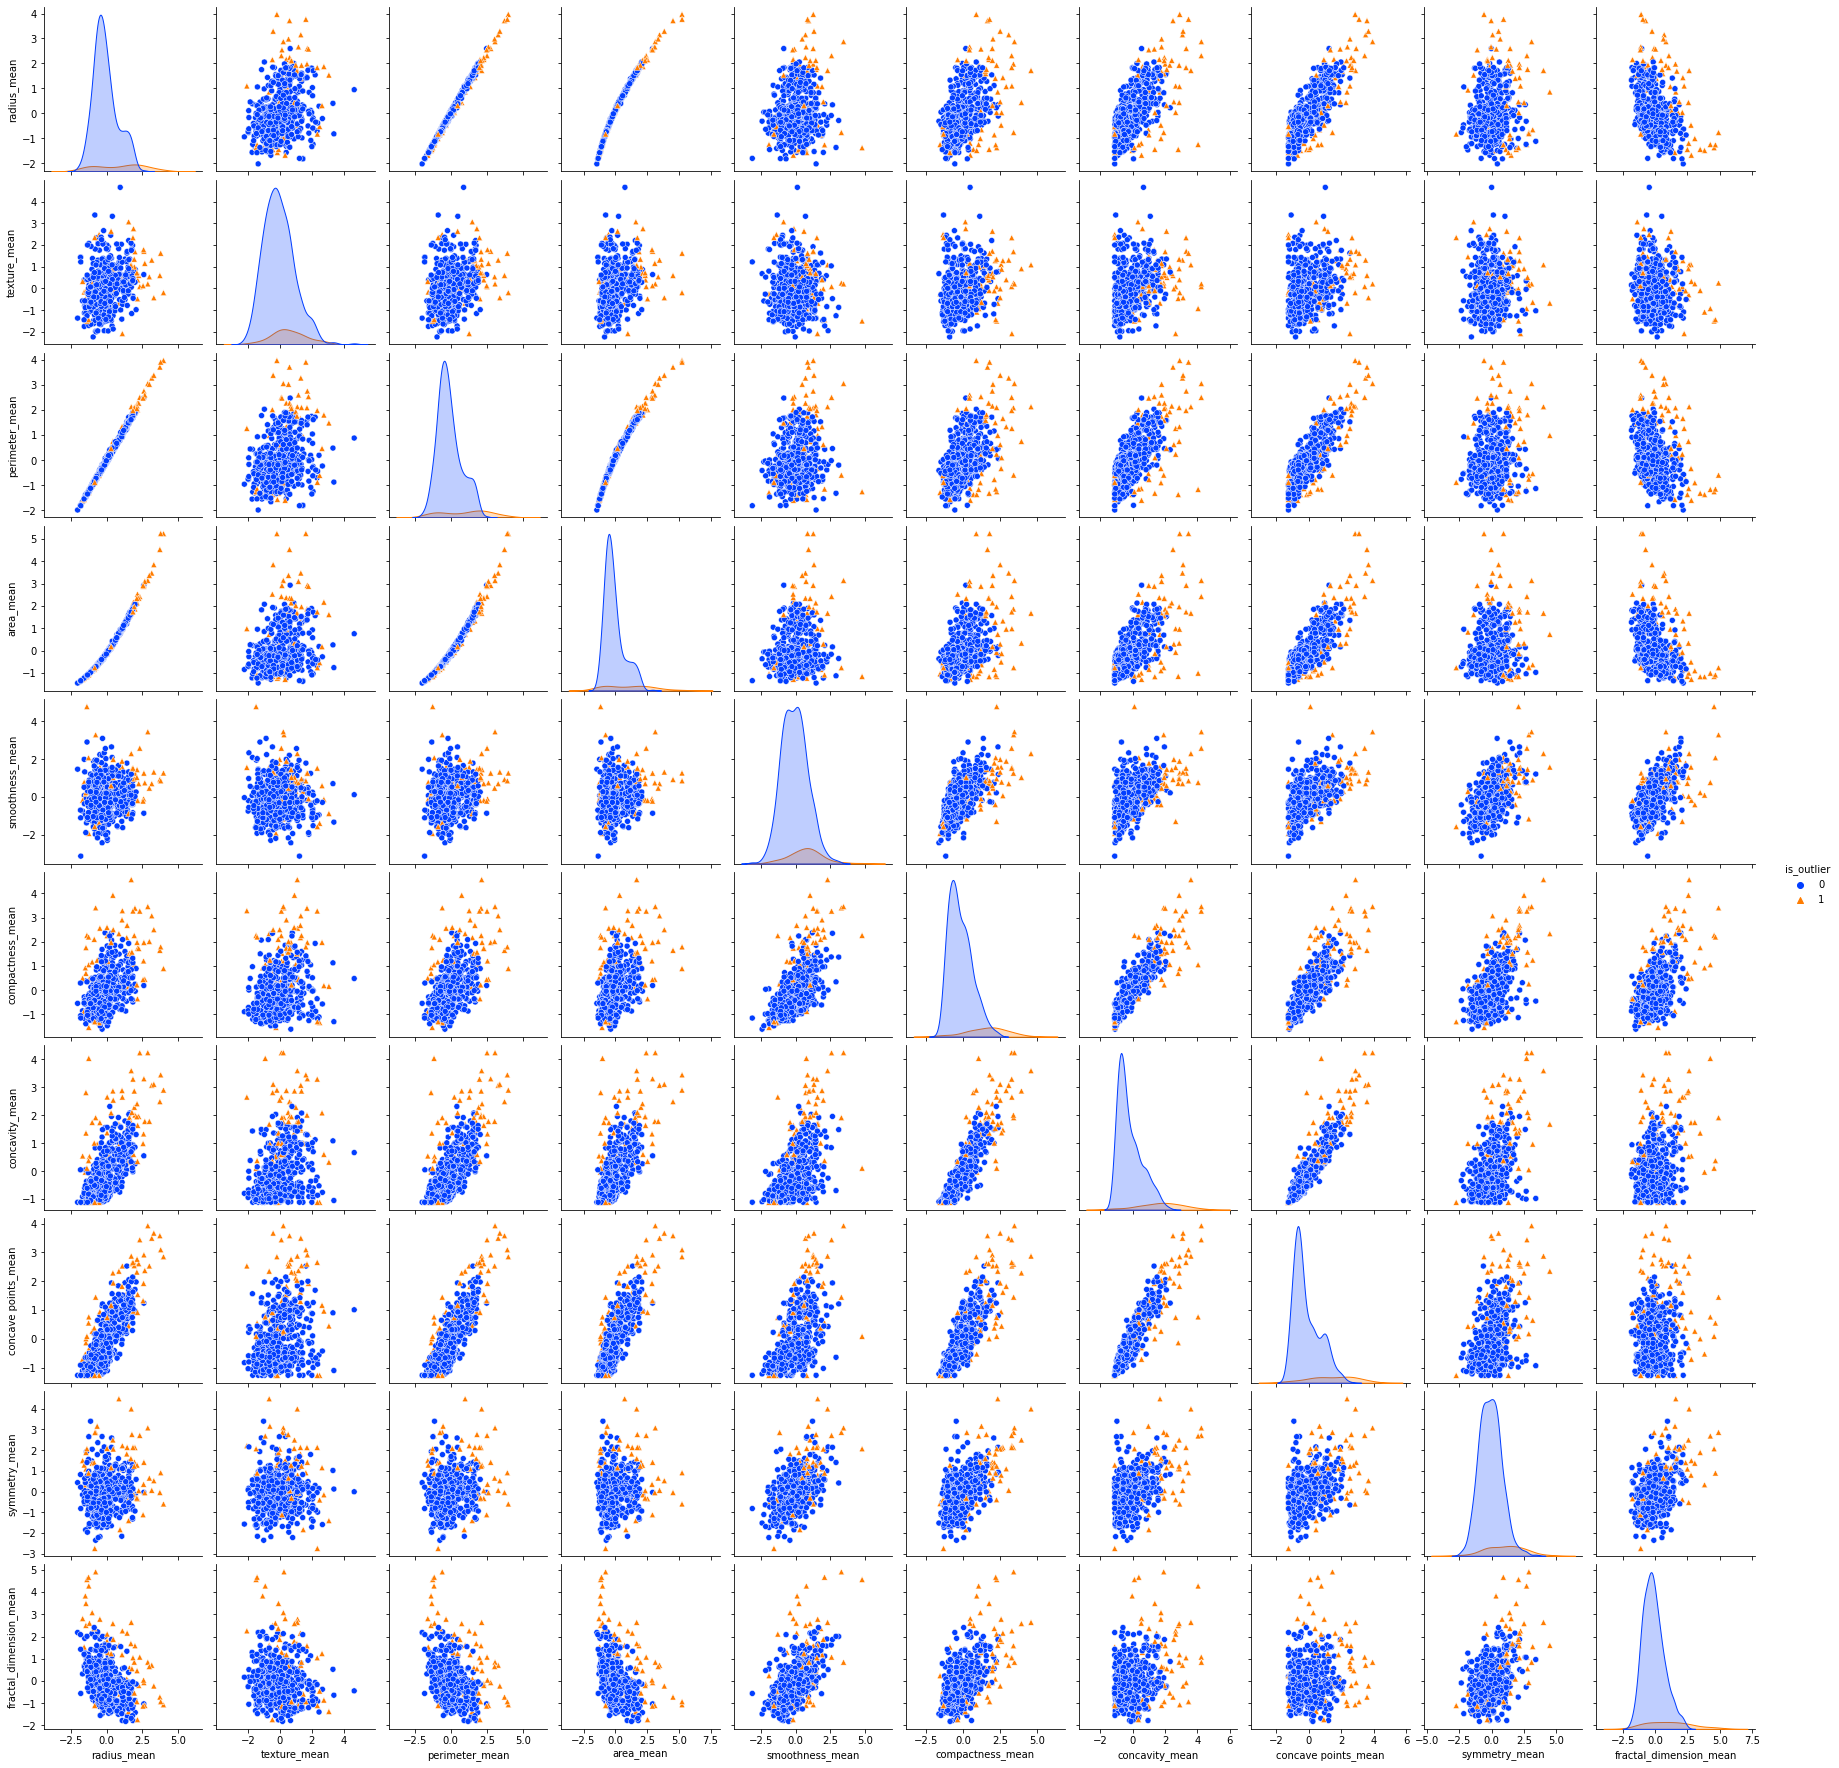

In [12]:

sns.pairplot(data=df_new[means], hue='is_outlier', hue_order=[0, 1], markers=['o', '^'], palette='bright')


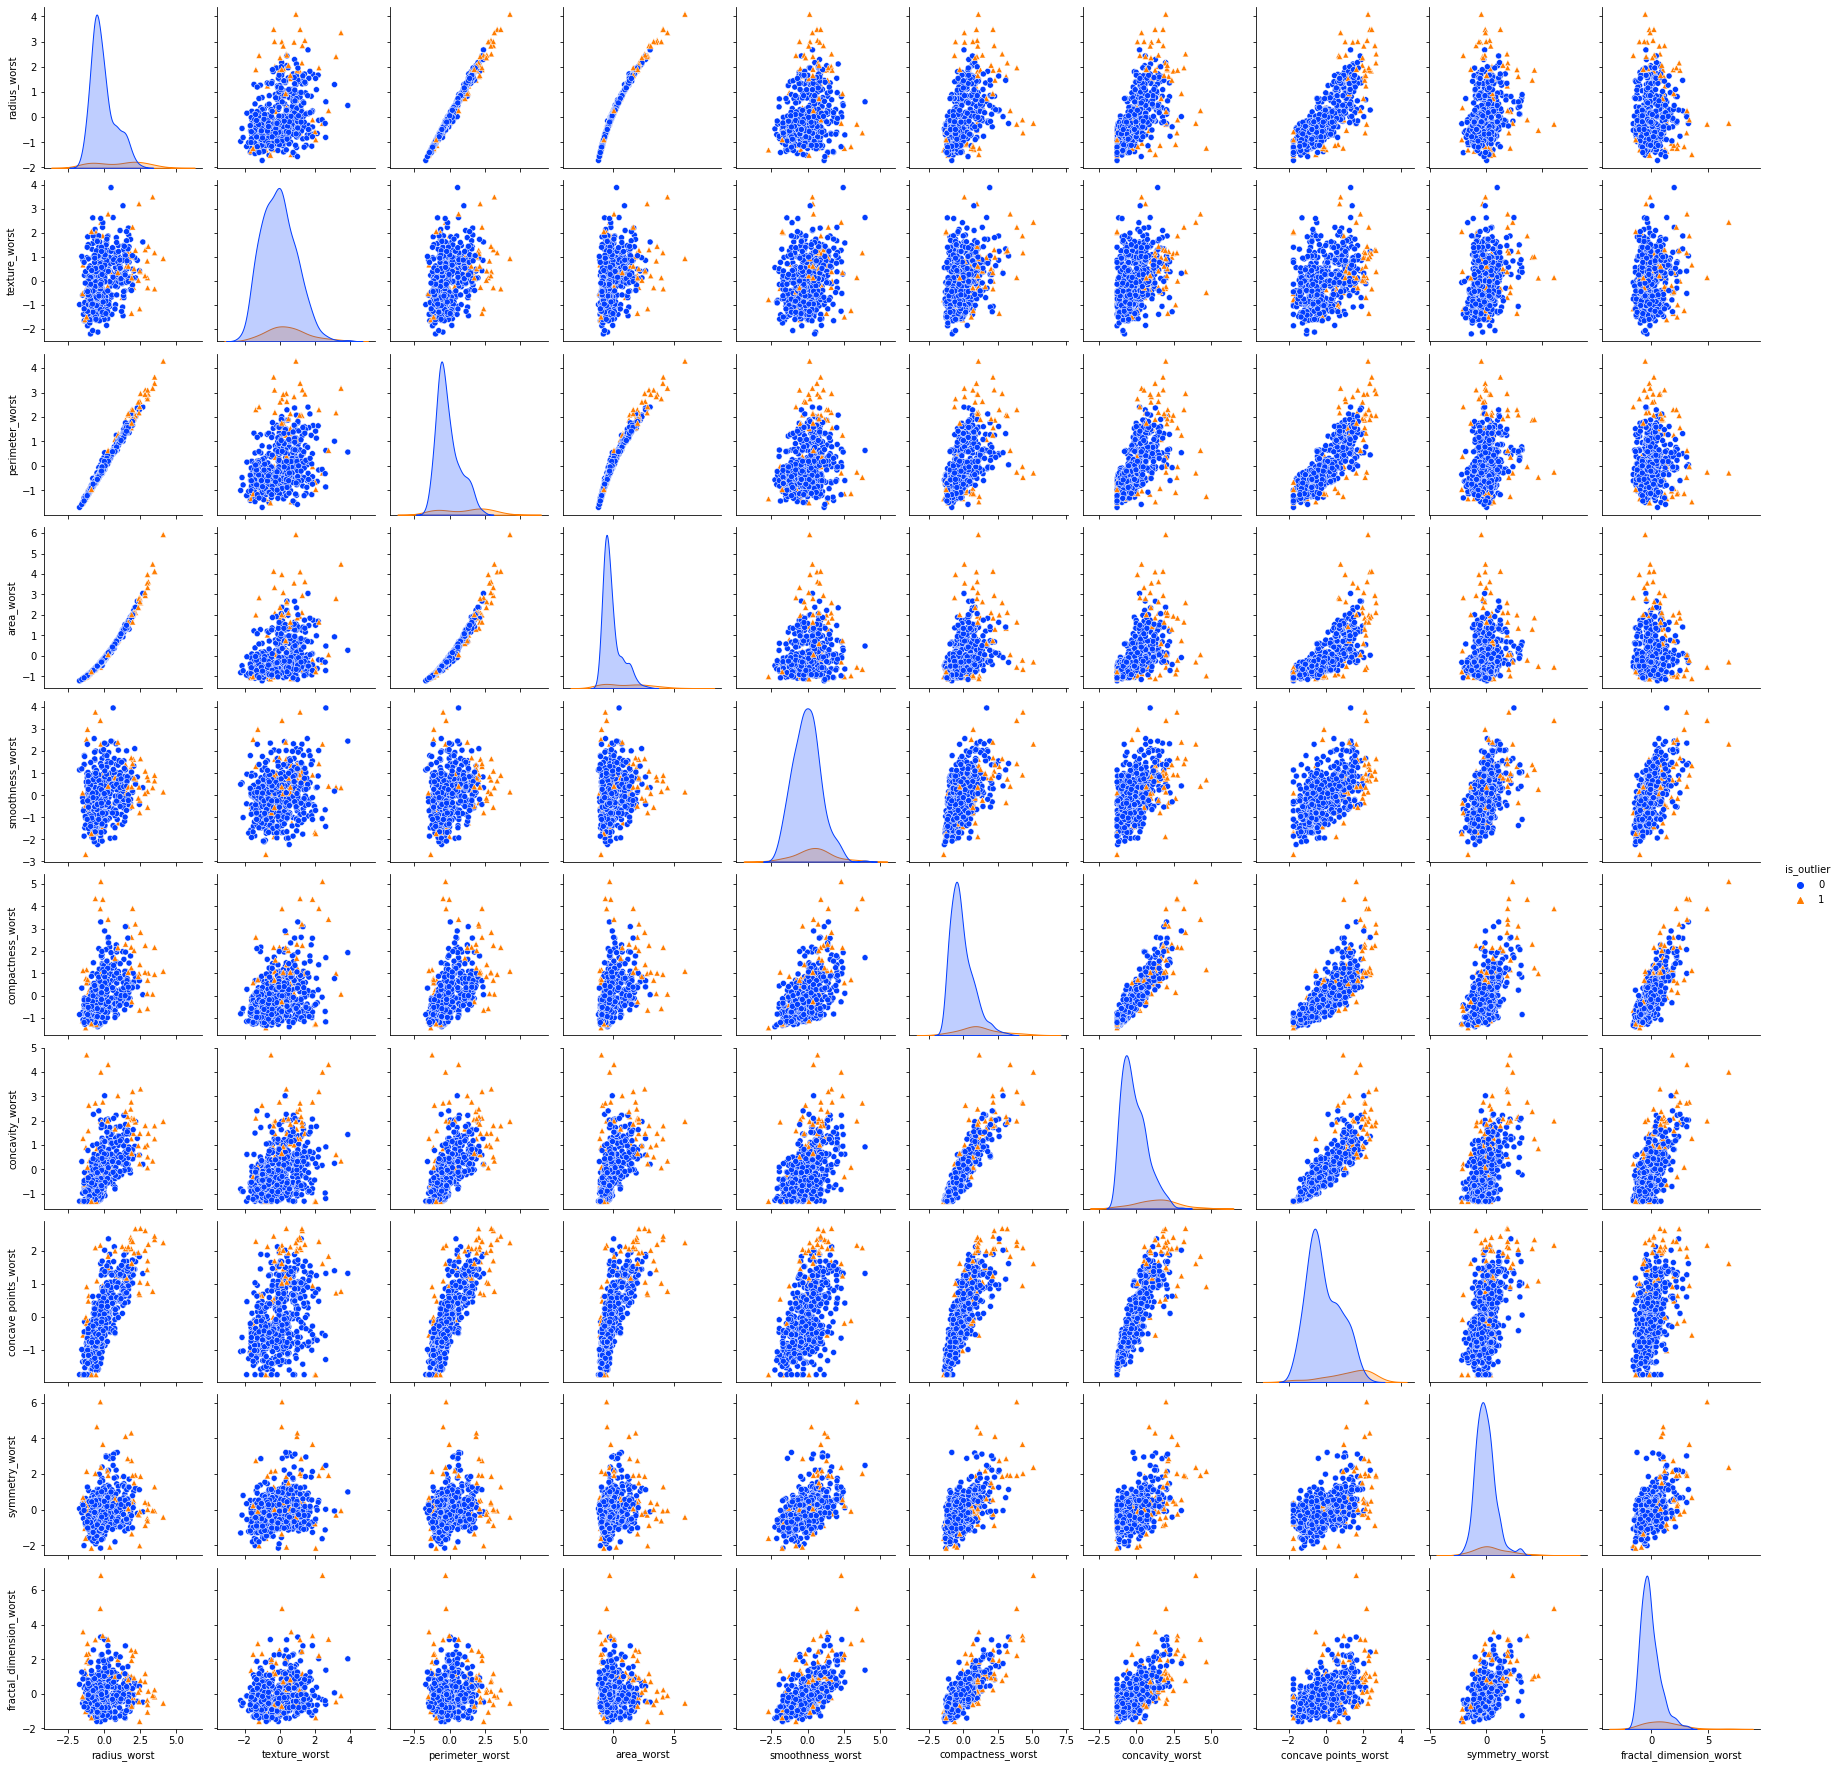

In [13]:
sns.pairplot(data=df_new[worst], hue='is_outlier', hue_order=[0, 1], markers=['o', '^'], palette='bright')

##### We can clearly see some outliers that were detected.

In [14]:
# Remove these outliers
df= df_new[df_new['is_outlier']==0]
df = df.drop(['is_outlier'],axis=1)

<AxesSubplot:>

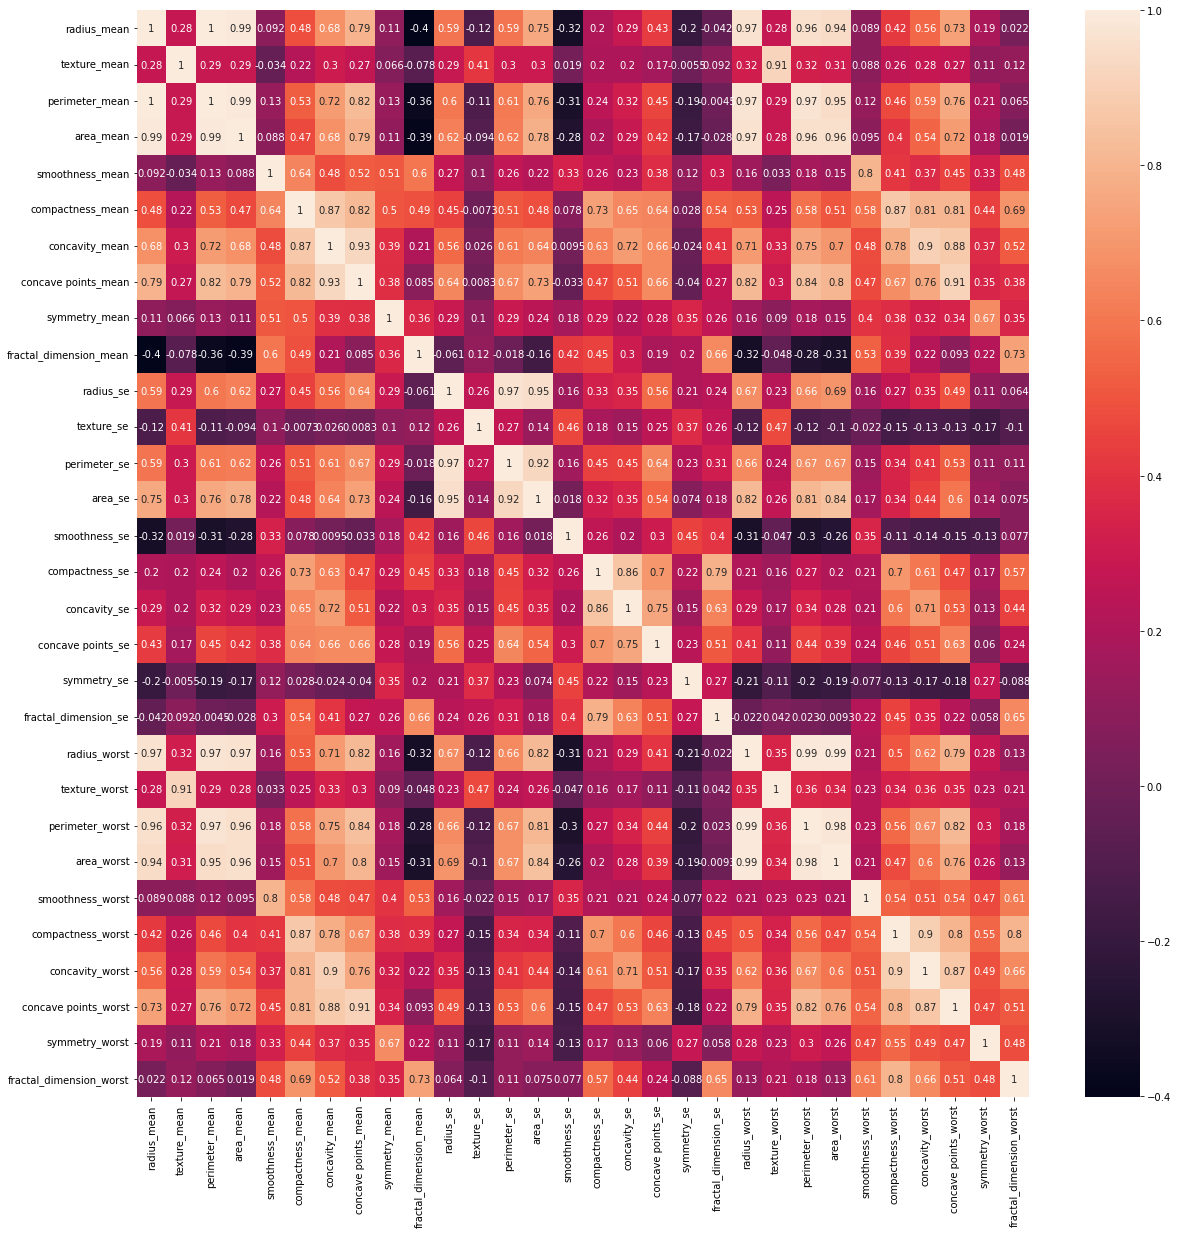

In [15]:
# Correlation Matrix to check if there is any correlation between predictor variables
plt.figure(figsize=(20,20))
sns.heatmap(df.corr(),annot=True)


##### From the correlation matrix, it can be clearly seen that many of the features are highly correlated. Lets confirm this by plotting a pair plot for mean columns 

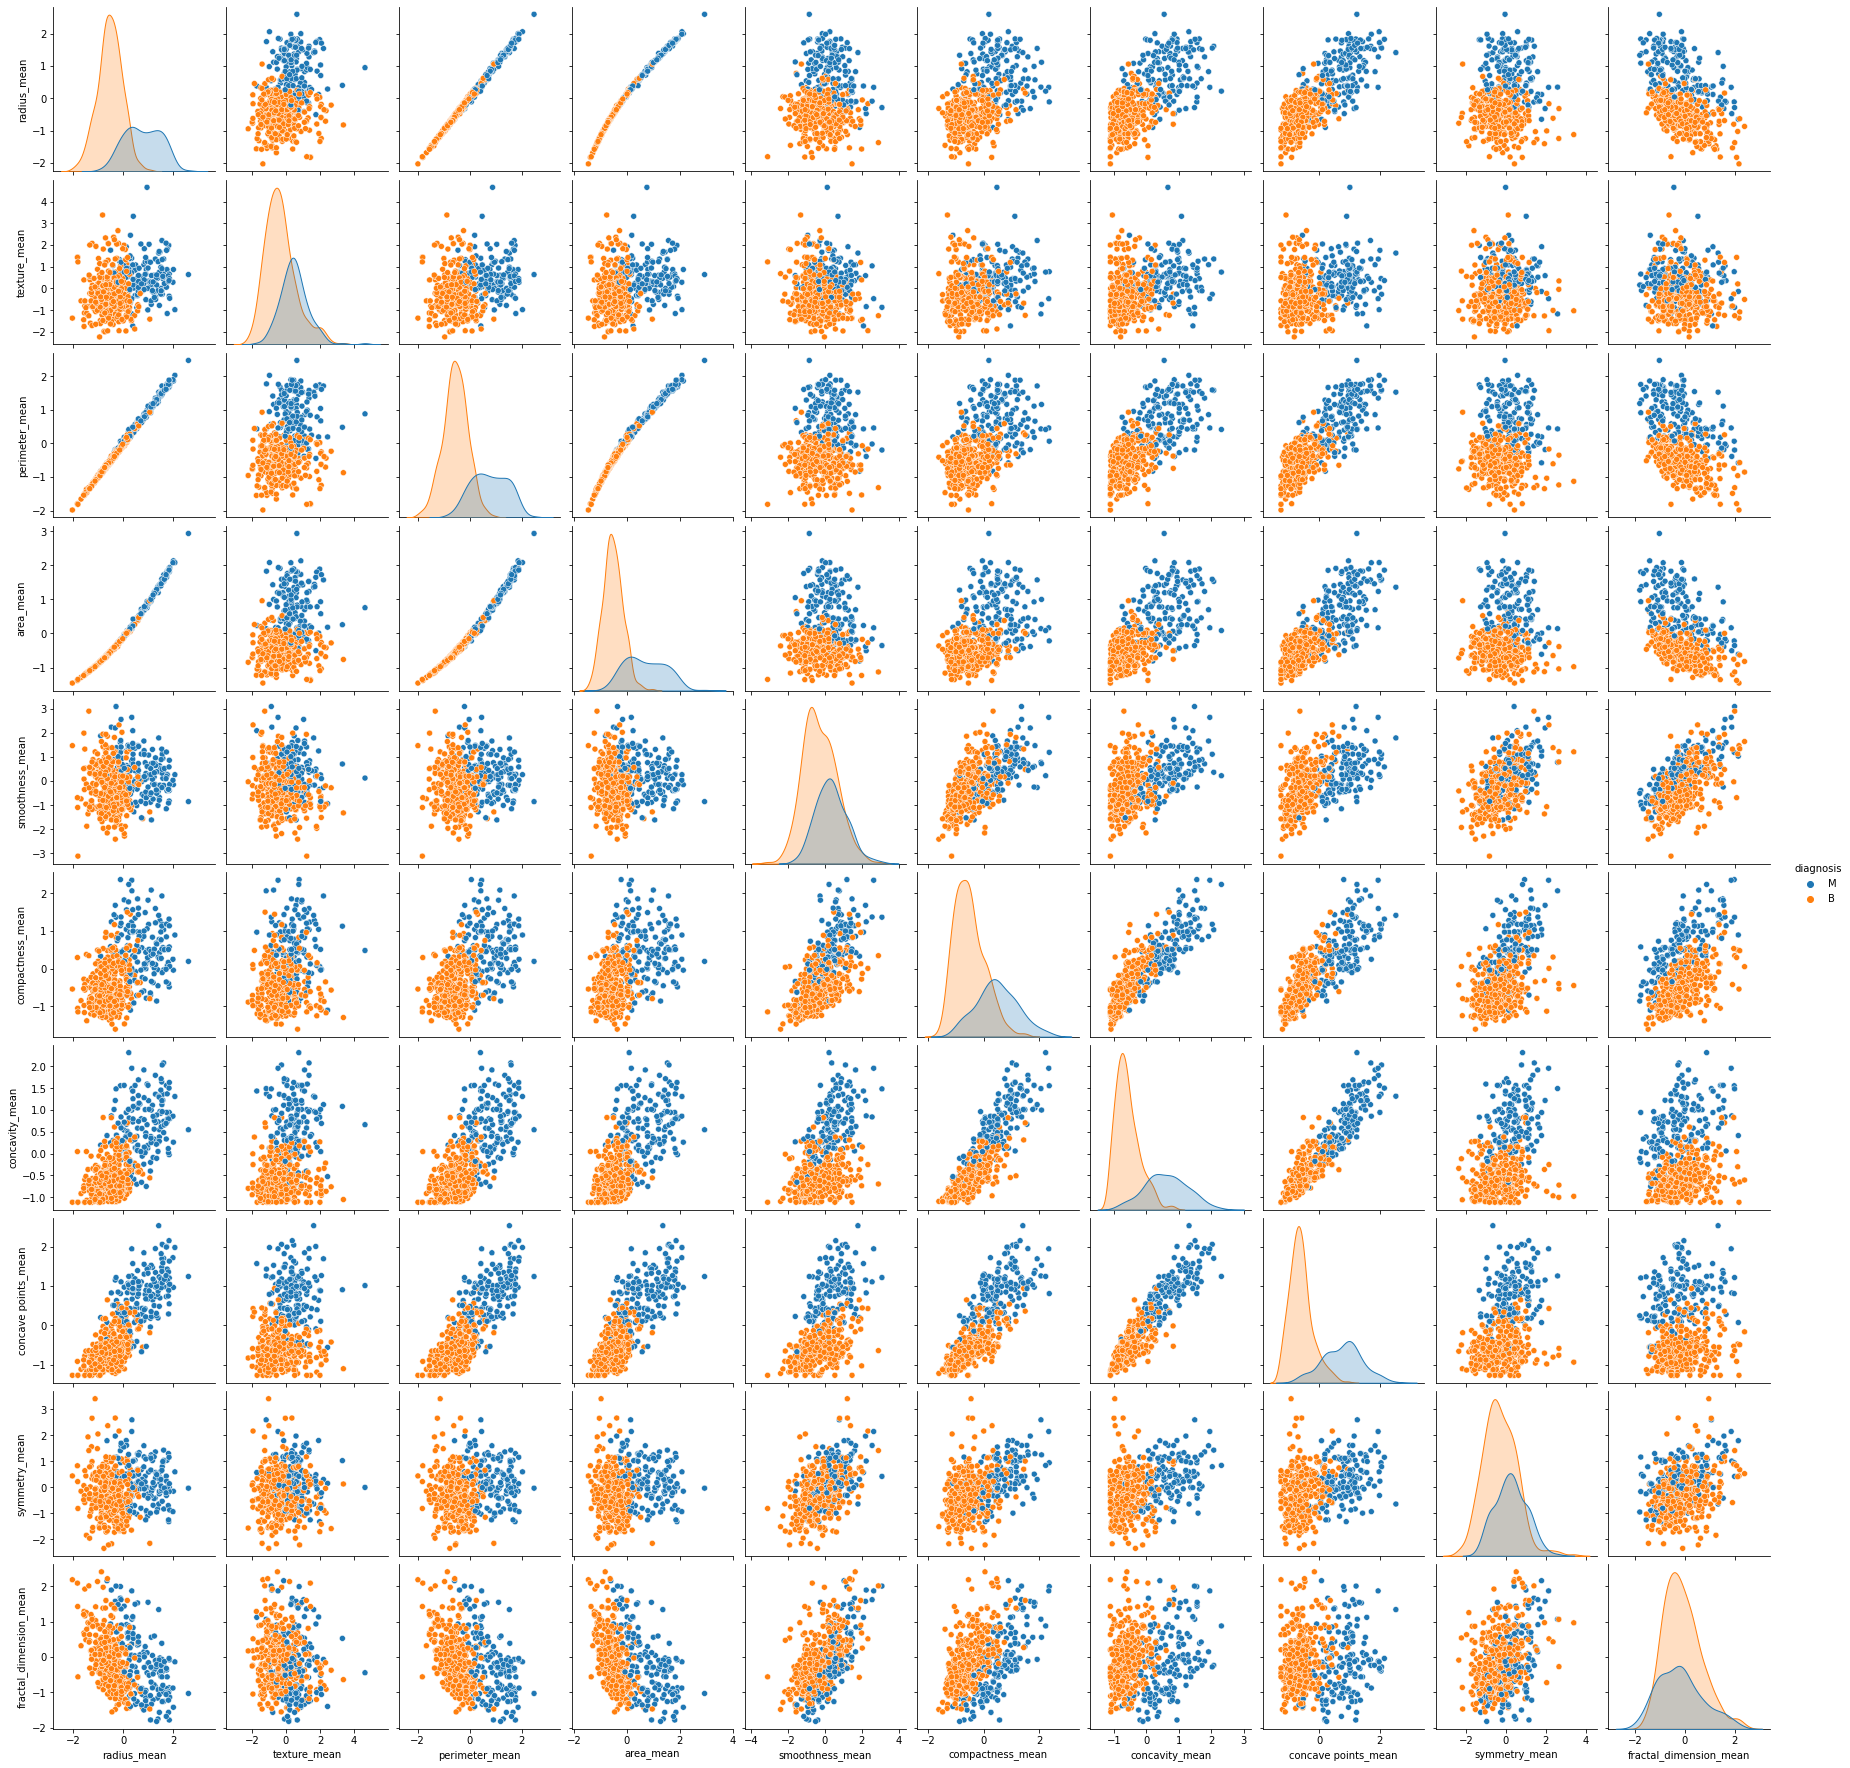

In [18]:
means.remove('is_outlier')
means.append('diagnosis')
sns.pairplot(data = df[means], hue = 'diagnosis')

##### From the pairplot again we can see that some features are highly correlated. This will lead to the problem of multicolinearity and hence we need to remove highly correlated features.

##### We can use PCA to do feature selection and remove correlation


### PCA 


In [19]:
df.head()

diagnosis  radius_mean  texture_mean  perimeter_mean  area_mean  \
1         M     1.829821     -0.353632        1.685955   1.908708   
2         M     1.579888      0.456187        1.566503   1.558884   
4         M     1.750297     -1.151816        1.776573   1.826229   
5         M    -0.476375     -0.835335       -0.387148  -0.505650   
6         M     1.170908      0.160649        1.138125   1.095295   

   smoothness_mean  compactness_mean  concavity_mean  concave points_mean  \
1        -0.826962         -0.487072       -0.023846             0.548144   
2         0.942210          1.052926        1.363478             2.037231   
4         0.280372          0.539340        1.371011             1.428493   
5         2.237421          1.244335        0.866302             0.824656   
6        -0.123136          0.088295        0.300072             0.646935   

   symmetry_mean  ...  radius_worst  texture_worst  perimeter_worst  \
1       0.001392  ...      1.805927      -0.369203         1.535126   
2       0.939685  ...      1.511870      -0.023974         1.347475   
4      -0.009560  ...      1.298575      -1.466770         1.338539   
5       1.005402  ...     -0.165498      -0.313836        -0.115009   
6      -0.064325  ...      1.368983       0.322883         1.368325   

   area_worst  smoothness_worst  compactness_worst  concavity_worst  \
1    1.890489         -0.375612          -0.430444        -0.146749   
2    1.456285          0.527407           1.082932         0.854974   
4    1.220724          0.220556          -0.313395         0.613179   
5   -0.244320          2.048513           1.721616         1.263243   
6    1.275220          0.518640           0.021215         0.509552   

   concave points_worst  symmetry_worst  fractal_dimension_worst  
1              1.087084       -0.243890                 0.281190  
2              1.955000        1.152255                 0.201391  
4              0.729259       -0.868353                -0.397100  
5              0.905888        1.754069                 2.241802  
6              1.196716        0.262476                -0.014730  

[5 rows x 31 columns]

In [20]:
# Label Encoding 
label_encoder = LabelEncoder()
df['diagnosis'] = label_encoder.fit_transform(df['diagnosis'])
df.head()

diagnosis  radius_mean  texture_mean  perimeter_mean  area_mean  \
1          1     1.829821     -0.353632        1.685955   1.908708   
2          1     1.579888      0.456187        1.566503   1.558884   
4          1     1.750297     -1.151816        1.776573   1.826229   
5          1    -0.476375     -0.835335       -0.387148  -0.505650   
6          1     1.170908      0.160649        1.138125   1.095295   

   smoothness_mean  compactness_mean  concavity_mean  concave points_mean  \
1        -0.826962         -0.487072       -0.023846             0.548144   
2         0.942210          1.052926        1.363478             2.037231   
4         0.280372          0.539340        1.371011             1.428493   
5         2.237421          1.244335        0.866302             0.824656   
6        -0.123136          0.088295        0.300072             0.646935   

   symmetry_mean  ...  radius_worst  texture_worst  perimeter_worst  \
1       0.001392  ...      1.805927      -0.369203         1.535126   
2       0.939685  ...      1.511870      -0.023974         1.347475   
4      -0.009560  ...      1.298575      -1.466770         1.338539   
5       1.005402  ...     -0.165498      -0.313836        -0.115009   
6      -0.064325  ...      1.368983       0.322883         1.368325   

   area_worst  smoothness_worst  compactness_worst  concavity_worst  \
1    1.890489         -0.375612          -0.430444        -0.146749   
2    1.456285          0.527407           1.082932         0.854974   
4    1.220724          0.220556          -0.313395         0.613179   
5   -0.244320          2.048513           1.721616         1.263243   
6    1.275220          0.518640           0.021215         0.509552   

   concave points_worst  symmetry_worst  fractal_dimension_worst  
1              1.087084       -0.243890                 0.281190  
2              1.955000        1.152255                 0.201391  
4              0.729259       -0.868353                -0.397100  
5              0.905888        1.754069                 2.241802  
6              1.196716        0.262476                -0.014730  

[5 rows x 31 columns]

Variances (Percentage):
[4.20977248e+01 1.79662400e+01 1.02198323e+01 8.12883669e+00
 5.98983083e+00 4.61049169e+00 2.09863897e+00 1.81939423e+00
 1.32082619e+00 1.20861536e+00 1.20549053e+00 7.53607818e-01
 6.03539695e-01 4.98408702e-01 3.16067773e-01 2.56995903e-01
 1.94857773e-01 1.50710259e-01 1.08120584e-01 9.81135150e-02
 9.56348171e-02 6.75854086e-02 5.90555060e-02 3.95900794e-02
 3.44155864e-02 2.84988547e-02 2.13682086e-02 4.96264263e-03
 2.12112904e-03 4.24221123e-04]



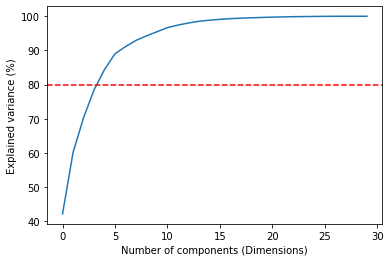

In [21]:
X = df.iloc[:,1:]
y = df.iloc[:,0]

# Applying PCA without selecting the numbe of components
pca = PCA(n_components=None)
pca.fit(X)


# Get explained variances
print("Variances (Percentage):")
print(pca.explained_variance_ratio_ * 100)
print()

# Make a scree plot
plt.plot(np.cumsum(pca.explained_variance_ratio_ * 100))
plt.xlabel("Number of components (Dimensions)")
plt.ylabel("Explained variance (%)")
plt.axhline(y = 80, color = 'r', linestyle = '--')
plt.show()

##### From the scree plot we can see that the first 4 components approximately account for 80 % of variance in the dataset and hence we will choose the first 4 components.


In [22]:
# Applying PCA 
pca = PCA(n_components=4)
X_pca = pca.fit_transform(X)

# Get the transformed dataset
X_pca = pd.DataFrame(X_pca)
print(X_pca.head())
print(X_pca.shape)




          0         1         2         3
0  3.152655 -3.535393 -1.034596 -0.953710
1  6.376898 -0.708280 -0.519104 -1.235637
2  4.326795 -1.604904 -0.485157 -3.700242
3  3.104099  4.515607 -2.320377  0.631099
4  3.141510 -2.322020 -1.149187  0.471726
(512, 4)


<AxesSubplot:>

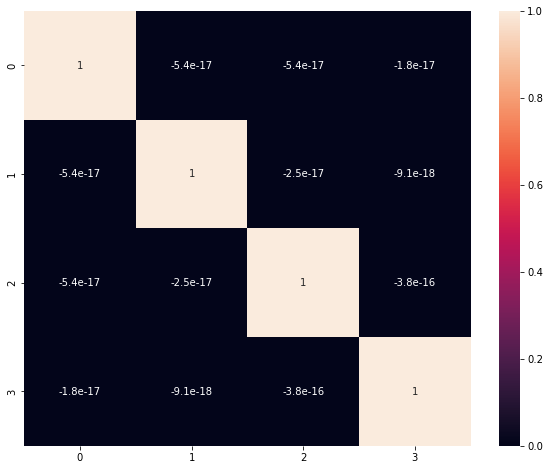

In [23]:
fig = plt.figure(figsize=(10, 8))
sns.heatmap(X_pca.corr(),annot=True)

##### We can see that the features of no correlation. Thanks to PCA !

### Splitting Data

In [24]:
x_train, x_test, y_train , y_test = train_test_split(X_pca,y, test_size=0.20 , random_state=0, stratify=y)

### Functions to Visualize Metrics

In [25]:
def plot_auc(t_y, p_y):
    plt.figure(figsize=(5,5))
    fpr, tpr, thresholds = roc_curve(t_y,p_y)
    auc_ans = auc(fpr, tpr)
    plt.plot(fpr,tpr, label = ('AUC: %0.3f '%auc_ans),color='red',lw=2)
    plt.plot([0, 1], [0, 1], color="navy", lw=2, linestyle="--")
    plt.title('ROC Curve')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.legend()
    plt.show()
    pass

def plot_precision_recall_curve(t_y, p_y):
    plt.figure(figsize=(5,5))
    precision, recall,threshold = precision_recall_curve(t_y,p_y)
    auc_prec = auc(recall, precision)
    plt.plot(recall,precision,label=('AUC: %0.3f'%auc_prec))
    plt.title('precision recall curve')
    plt.ylabel('Precision')
    plt.xlabel('Recall')
    plt.legend()
    plt.show()
    return precision,recall

def ConfusionMatrix(t_y,p_y):
    cm = confusion_matrix(t_y,p_y)
    sns.heatmap(cm, annot=True,fmt='g')
    plt.ylabel('True Label')
    plt.xlabel('Predicted Label')
    plt.show()
    pass

### Models

In [26]:
model_comparision = {}

#### a) Logistice Regression

Testing Accuracy:  0.970873786407767
Precision: 0.970
Recall: 0.941
F-measure: 0.955


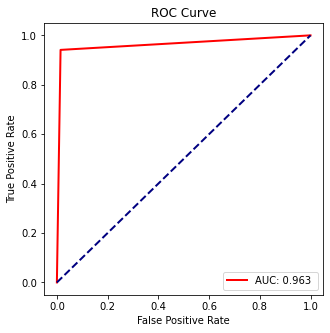

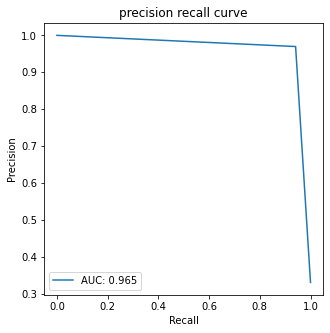

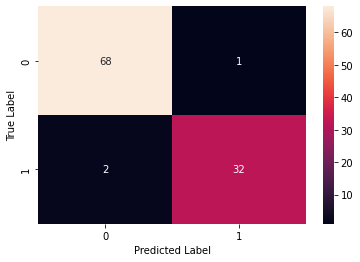

In [27]:
logreg = LogisticRegression(random_state=0)
logreg.fit(x_train, y_train)

y_pred = logreg.predict(x_test)
acc_test = accuracy_score(y_test, y_pred)
print('Testing Accuracy: ', acc_test)

perc_score = precision_score(y_test, y_pred)
rec_score= recall_score(y_test, y_pred)
f1score = f1_score(y_test, y_pred)

print('Precision: %.3f' %perc_score )
print('Recall: %.3f' %rec_score)
print('F-measure: %.3f' %f1score)

model_comparision['Logistic Regression'] = [perc_score, rec_score, f1score]

# Visualize Metrics
plot_auc(y_test,y_pred)
plot_precision_recall_curve(y_test, y_pred)
ConfusionMatrix(y_test,y_pred)


#### b) Random Forest

Testing Accuracy:  0.970873786407767
Precision: 0.970
Recall: 0.941
F-measure: 0.955


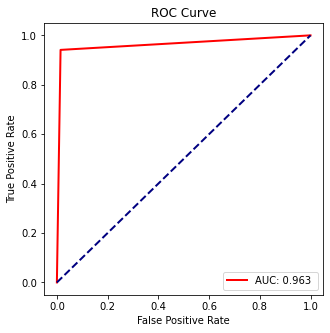

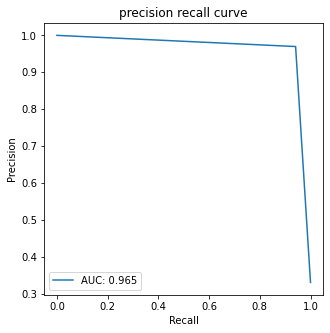

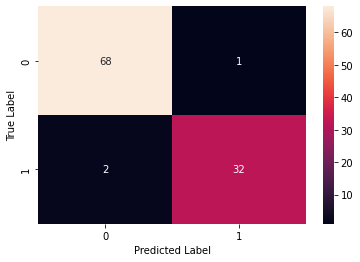

In [28]:
rf = RandomForestClassifier(n_estimators = 150, criterion= 'gini', random_state = 0,max_depth=90,max_leaf_nodes=120)
rf.fit(x_train, y_train)
y_pred = rf.predict(x_test)
acc_test = accuracy_score(y_test, y_pred)
print('Testing Accuracy: ', acc_test)
perc_score = precision_score(y_test, y_pred)
rec_score= recall_score(y_test, y_pred)
f1score = f1_score(y_test, y_pred)
print('Precision: %.3f' %perc_score )
print('Recall: %.3f' %rec_score)
print('F-measure: %.3f' %f1score)

model_comparision['Random Forest'] = [perc_score, rec_score, f1score]

plot_auc(y_test,y_pred)
plot_precision_recall_curve(y_test, y_pred)
ConfusionMatrix(y_test,y_pred)

#### c) Decision Tree

Testing Accuracy:  0.9223300970873787
Precision: 0.825
Recall: 0.971
F-measure: 0.892


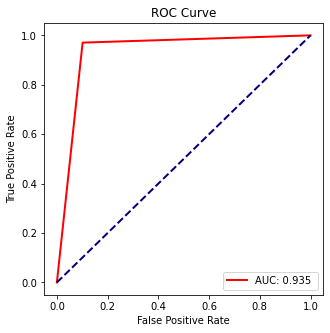

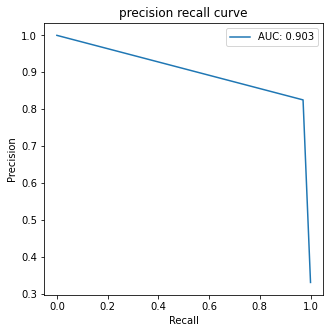

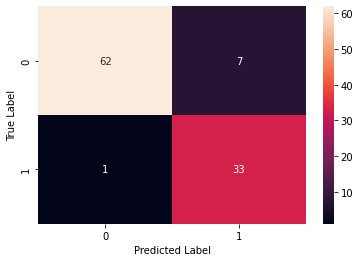

In [29]:
dt =DecisionTreeClassifier(max_depth=12, criterion= 'gini')
dt.fit(x_train, y_train)
y_pred = dt.predict(x_test)
acc_test = accuracy_score(y_test, y_pred)
print('Testing Accuracy: ', acc_test)
perc_score = precision_score(y_test, y_pred)
rec_score= recall_score(y_test, y_pred)
f1score = f1_score(y_test, y_pred)
print('Precision: %.3f' %perc_score )
print('Recall: %.3f' %rec_score)
print('F-measure: %.3f' %f1score)

model_comparision['Decision Tree'] = [perc_score, rec_score, f1score]

plot_auc(y_test,y_pred)
plot_precision_recall_curve(y_test, y_pred)
ConfusionMatrix(y_test,y_pred)

#### d) XGBoost

Testing Accuracy:  0.9611650485436893
Precision: 0.941
Recall: 0.941
F-measure: 0.941


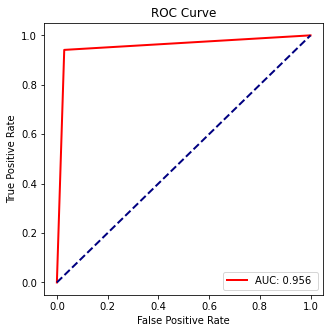

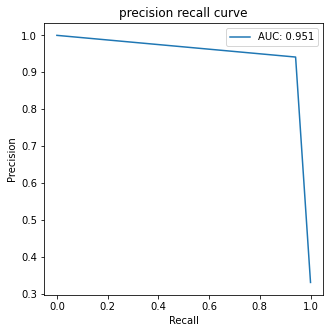

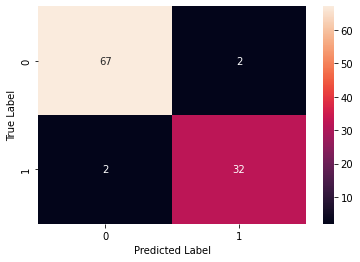

In [30]:
xgb = XGBClassifier(eval_metric= 'error', learning_rate= 0.05)
xgb.fit(x_train, y_train)
y_pred = xgb.predict(x_test)
acc_test = accuracy_score(y_test, y_pred)
print('Testing Accuracy: ', acc_test)
perc_score = precision_score(y_test, y_pred)
rec_score= recall_score(y_test, y_pred)
f1score = f1_score(y_test, y_pred)
print('Precision: %.3f' %perc_score )
print('Recall: %.3f' %rec_score)
print('F-measure: %.3f' %f1score)

model_comparision['XGB'] = [perc_score, rec_score, f1score]

plot_auc(y_test,y_pred)
plot_precision_recall_curve(y_test, y_pred)
ConfusionMatrix(y_test,y_pred)

#### e) SVM

Testing Accuracy:  0.9029126213592233
Precision: 0.875
Recall: 0.824
F-measure: 0.848


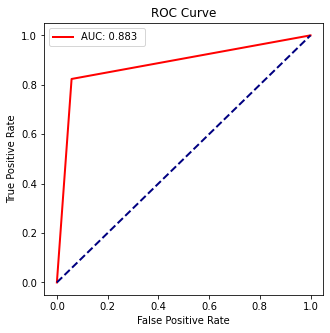

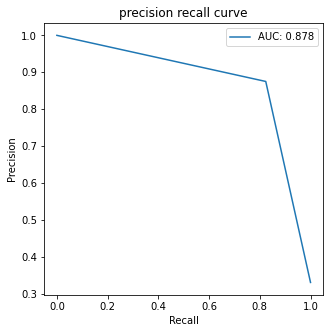

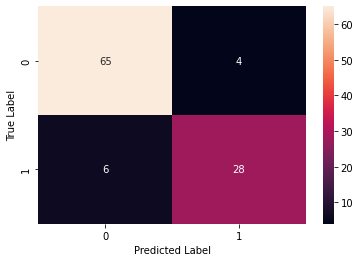

In [31]:
svc = SVC(C=1, gamma=1 ,probability= True, kernel='rbf')
svc.fit(x_train, y_train)
y_pred = svc.predict(x_test)
acc_test = accuracy_score(y_test, y_pred)
print('Testing Accuracy: ', acc_test)
perc_score = precision_score(y_test, y_pred)
rec_score= recall_score(y_test, y_pred)
f1score = f1_score(y_test, y_pred)
print('Precision: %.3f' %perc_score )
print('Recall: %.3f' %rec_score)
print('F-measure: %.3f' %f1score)

model_comparision['SVM'] = [perc_score, rec_score, f1score]

plot_auc(y_test,y_pred)
plot_precision_recall_curve(y_test, y_pred)
ConfusionMatrix(y_test,y_pred)

#### f) Naive Bayes

Testing Accuracy:  0.9320388349514563
Precision: 0.935
Recall: 0.853
F-measure: 0.892


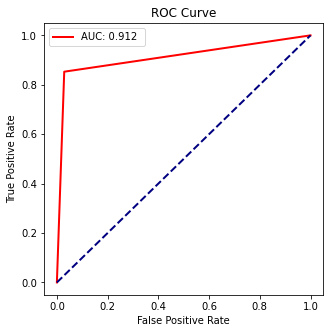

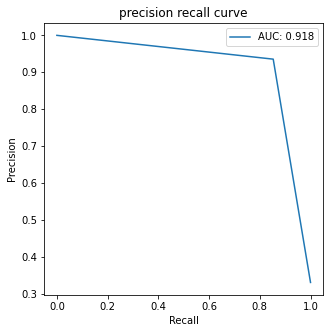

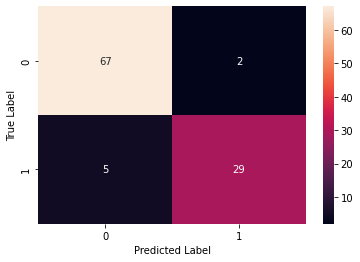

In [32]:
GNBclf = GaussianNB()
GNBclf.fit(x_train, y_train)
y_pred = GNBclf.predict(x_test)

acc_test = accuracy_score(y_test, y_pred)
print('Testing Accuracy: ', acc_test)

perc_score = precision_score(y_test, y_pred)
rec_score= recall_score(y_test, y_pred)
f1score = f1_score(y_test, y_pred)

print('Precision: %.3f' %perc_score )
print('Recall: %.3f' %rec_score)
print('F-measure: %.3f' %f1score)

plot_auc(y_test,y_pred)
plot_precision_recall_curve(y_test, y_pred)
ConfusionMatrix(y_test,y_pred)

model_comparision['Naive Bayes'] = [perc_score, rec_score, f1score]

In [33]:
model_comparison_df = pd.DataFrame.from_dict(model_comparision).T
model_comparison_df.columns = ['Precision', 'Recall', 'F1']
model_comparison_df = model_comparison_df.sort_values('Recall', ascending=False)
model_comparison_df.style.background_gradient(cmap='Blues')

### Tuning

*Finding best parameters for our models using gridsearch*

*In cancer prediction the cost of false negatives is quite high, for example, if the patient is at high risk of having cancer but no medication is given to them because the model classified them as negative ?* 


In [34]:
param_grid = {'C':[0.1,1,10,100,1000], 'penalty':["l1","l2"]}
model = LogisticRegression()
grid = GridSearchCV(model,param_grid, scoring ='recall' ,cv=5)
print("Searching for best hyperparameters for Logistic Regression...")
grid.fit(x_train, y_train)
best_accuracy = grid.best_score_
best_param = grid.best_params_
print('Best Score : ',best_accuracy*100)
print('Best Parameters : ',best_param)
print('----------------')

Searching for best hyperparameters for Logistic Regression...
Best Score :  92.01058201058201
Best Parameters :  {'C': 1, 'penalty': 'l2'}
----------------


In [35]:
param_grid = {'max_depth':[6,10,12,14,18,20] ,'criterion':['gini','entropy'],'random_state':[0]}
model = DecisionTreeClassifier()
grid = GridSearchCV(model,param_grid, scoring ='recall',cv=5)
#grid = GridSearchCV(model,param_grid, scoring = 'recall',cv=5)
print("Searching for best hyperparameters for Decision Tree...")
grid.fit(x_train, y_train)
best_accuracy = grid.best_score_
best_param = grid.best_params_
print('Best Score : ',best_accuracy*100)
print('Best Parameters : ',best_param)
print('----------------')

Searching for best hyperparameters for Decision Tree...
Best Score :  89.10052910052912
Best Parameters :  {'criterion': 'gini', 'max_depth': 10, 'random_state': 0}
----------------


In [36]:
param_grid = {'n_estimators':[100,150,200],'max_depth': [60,90,100,120],'max_leaf_nodes':[60, 80, 100, 120],'criterion':['gini','entropy'],'random_state':[0]}
model = RandomForestClassifier()
grid = GridSearchCV(model,param_grid, scoring = 'recall',cv=5)
print("Searching for best hyperparameters for Random Forrest...")
grid.fit(x_train, y_train)
best_accuracy = grid.best_score_
best_param = grid.best_params_
print('Best Score : ',best_accuracy*100)
print('Best Parameters : ',best_param)
print('----------------')

Searching for best hyperparameters for Random Forrest...
Best Score :  89.7883597883598
Best Parameters :  {'criterion': 'entropy', 'max_depth': 60, 'max_leaf_nodes': 60, 'n_estimators': 100, 'random_state': 0}
----------------


In [37]:
param_grid = {'learning_rate': [0.01,0.05, 0.1, 0.5, 1], 'eval_metric': ['error']}
model = XGBClassifier()
grid = GridSearchCV(model,param_grid, scoring = 'recall',cv=5)
print("Searching for best hyperparameters for XGBoost...")
grid.fit(x_train, y_train)
best_accuracy = grid.best_score_
best_param = grid.best_params_
print('Best Score : ',best_accuracy*100)
print('Best Parameters : ',best_param)
print('----------------')

Searching for best hyperparameters for XGBoost...
Best Score :  89.04761904761905
Best Parameters :  {'eval_metric': 'error', 'learning_rate': 1}
----------------


In [38]:
param_grid = {'C':[0.1,1,10], 'gamma':[1, 0.1, 0.01,'auto'],'kernel':[ 'rbf','sigmoid','poly'],'random_state':[0]}
model = SVC(probability=True)
grid = GridSearchCV(model,param_grid, scoring = 'recall',cv=5)
print("Searching for best hyperparameters for SVM...")
grid.fit(x_train, y_train)
best_accuracy = grid.best_score_
best_param = grid.best_params_
print('Best Score : ',best_accuracy*100)
print('Best Parameters : ',best_param)
print('----------------')

Searching for best hyperparameters for SVM...
Best Score :  91.26984126984127
Best Parameters :  {'C': 10, 'gamma': 0.01, 'kernel': 'rbf', 'random_state': 0}
----------------


In [39]:
param_grid = {'var_smoothing': [1e-9, 1e-6, 1e-12]}
model =  GaussianNB()
grid = GridSearchCV(model,param_grid, scoring = 'recall',cv=5)
print("Searching for best hyperparameters for Naive...")
grid.fit(x_train, y_train)
best_accuracy = grid.best_score_
best_param = grid.best_params_
print('Best Score : ',best_accuracy*100)
print('Best Parameters : ',best_param)
print('----------------')



Searching for best hyperparameters for Naive...
Best Score :  89.1005291005291
Best Parameters :  {'var_smoothing': 1e-09}
----------------


### Tuning Models

In [40]:
model_compare = {}

#### a) Logistic Regression

Testing Accuracy:  0.970873786407767
Precision: 0.970
Recall: 0.941
F-measure: 0.955


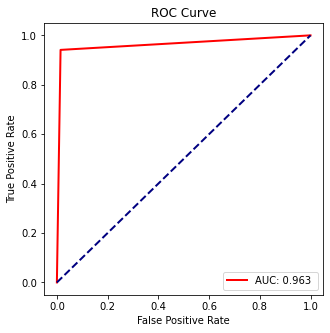

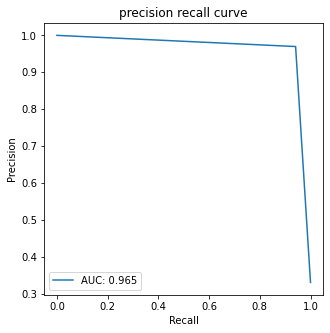

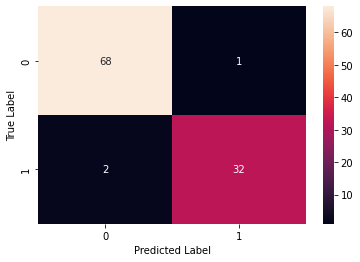

In [41]:
logreg = LogisticRegression(C = 1, penalty = 'l2',random_state=0)
logreg.fit(x_train, y_train)

y_pred = logreg.predict(x_test)
acc_test = accuracy_score(y_test, y_pred)
print('Testing Accuracy: ', acc_test)

perc_score = precision_score(y_test, y_pred)
rec_score= recall_score(y_test, y_pred)
f1score = f1_score(y_test, y_pred)

print('Precision: %.3f' %perc_score )
print('Recall: %.3f' %rec_score)
print('F-measure: %.3f' %f1score)

model_compare['Logistic Regression'] = [perc_score, rec_score, f1score]

# Visualize Metrics
plot_auc(y_test,y_pred)
plot_precision_recall_curve(y_test, y_pred)
ConfusionMatrix(y_test,y_pred)


#### b) Decision Tree

Testing Accuracy:  0.9611650485436893
Precision: 1.000
Recall: 0.882
F-measure: 0.938


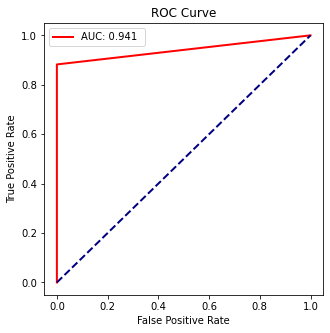

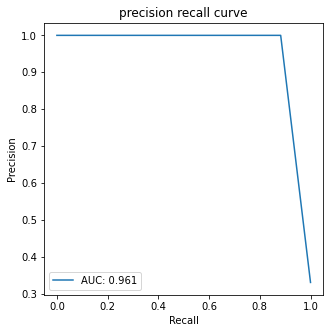

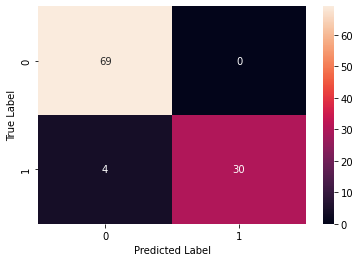

In [42]:
dt =DecisionTreeClassifier(max_depth=6, criterion= 'entropy', random_state=0)
dt.fit(x_train, y_train)
y_pred = dt.predict(x_test)
acc_test = accuracy_score(y_test, y_pred)
print('Testing Accuracy: ', acc_test)
perc_score = precision_score(y_test, y_pred)
rec_score= recall_score(y_test, y_pred)
f1score = f1_score(y_test, y_pred)
print('Precision: %.3f' %perc_score )
print('Recall: %.3f' %rec_score)
print('F-measure: %.3f' %f1score)

model_compare['Decision Tree'] = [perc_score, rec_score, f1score]

plot_auc(y_test,y_pred)
plot_precision_recall_curve(y_test, y_pred)
ConfusionMatrix(y_test,y_pred)

#### c) Random Forest

Testing Accuracy:  0.970873786407767
Precision: 0.970
Recall: 0.941
F-measure: 0.955


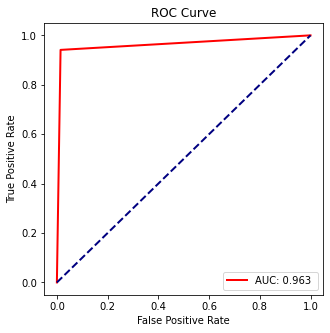

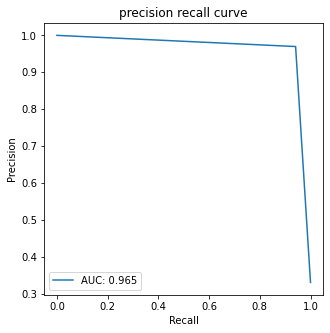

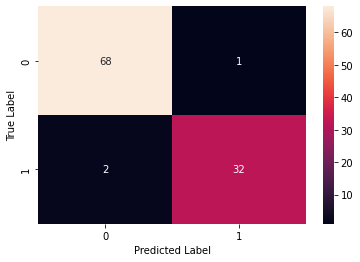

In [43]:
rf = RandomForestClassifier(n_estimators = 100, criterion= 'gini', random_state = 0,max_depth=60,max_leaf_nodes=60)
rf.fit(x_train, y_train)
y_pred = rf.predict(x_test)
acc_test = accuracy_score(y_test, y_pred)
print('Testing Accuracy: ', acc_test)
perc_score = precision_score(y_test, y_pred)
rec_score= recall_score(y_test, y_pred)
f1score = f1_score(y_test, y_pred)
print('Precision: %.3f' %perc_score )
print('Recall: %.3f' %rec_score)
print('F-measure: %.3f' %f1score)

model_compare['Random Forest'] = [perc_score, rec_score, f1score]

plot_auc(y_test,y_pred)
plot_precision_recall_curve(y_test, y_pred)
ConfusionMatrix(y_test,y_pred)

#### d) XGBoost

Testing Accuracy:  0.9611650485436893
Precision: 0.941
Recall: 0.941
F-measure: 0.941


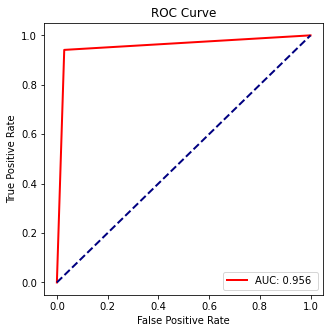

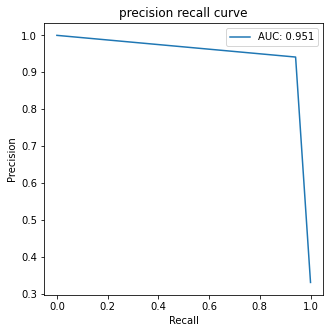

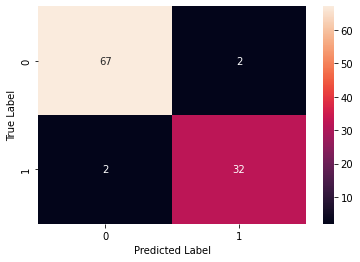

In [44]:
xgb = XGBClassifier(eval_metric= 'error', learning_rate= 0.1)
xgb.fit(x_train, y_train)
y_pred = xgb.predict(x_test)
acc_test = accuracy_score(y_test, y_pred)
print('Testing Accuracy: ', acc_test)
perc_score = precision_score(y_test, y_pred)
rec_score= recall_score(y_test, y_pred)
f1score = f1_score(y_test, y_pred)
print('Precision: %.3f' %perc_score )
print('Recall: %.3f' %rec_score)
print('F-measure: %.3f' %f1score)

model_compare['XGB'] = [perc_score, rec_score, f1score]

plot_auc(y_test,y_pred)
plot_precision_recall_curve(y_test, y_pred)
ConfusionMatrix(y_test,y_pred)

#### e) SVM

Testing Accuracy:  0.9029126213592233
Precision: 0.875
Recall: 0.824
F-measure: 0.848


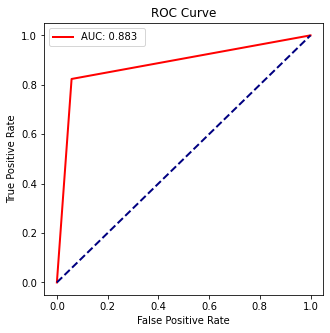

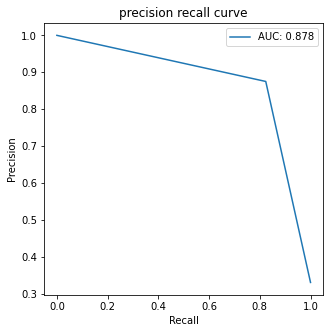

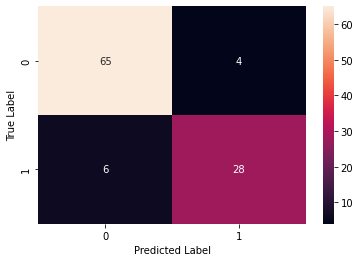

In [45]:
svc = SVC(C=1, gamma=1 ,probability= True, kernel='rbf')
svc.fit(x_train, y_train)
y_pred = svc.predict(x_test)
acc_test = accuracy_score(y_test, y_pred)
print('Testing Accuracy: ', acc_test)
perc_score = precision_score(y_test, y_pred)
rec_score= recall_score(y_test, y_pred)
f1score = f1_score(y_test, y_pred)
print('Precision: %.3f' %perc_score )
print('Recall: %.3f' %rec_score)
print('F-measure: %.3f' %f1score)

model_compare['SVM'] = [perc_score, rec_score, f1score]

plot_auc(y_test,y_pred)
plot_precision_recall_curve(y_test, y_pred)
ConfusionMatrix(y_test,y_pred)

#### f) Naive Bayes

Testing Accuracy:  0.9320388349514563
Precision: 0.935
Recall: 0.853
F-measure: 0.892


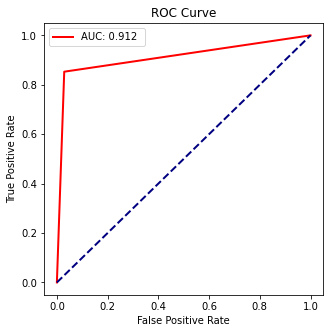

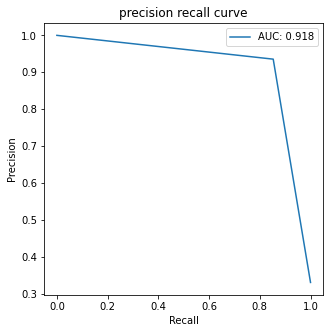

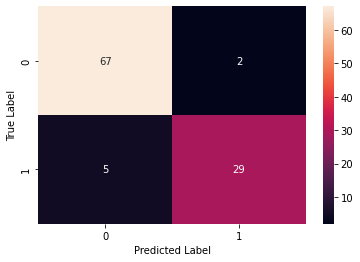

In [46]:
GNBclf = GaussianNB(var_smoothing=1e-09)
GNBclf.fit(x_train, y_train)
y_pred = GNBclf.predict(x_test)

acc_test = accuracy_score(y_test, y_pred)
print('Testing Accuracy: ', acc_test)

perc_score = precision_score(y_test, y_pred)
rec_score= recall_score(y_test, y_pred)
f1score = f1_score(y_test, y_pred)

print('Precision: %.3f' %perc_score )
print('Recall: %.3f' %rec_score)
print('F-measure: %.3f' %f1score)

plot_auc(y_test,y_pred)
plot_precision_recall_curve(y_test, y_pred)
ConfusionMatrix(y_test,y_pred)

model_compare['Naive Bayes'] = [perc_score, rec_score, f1score]

In [47]:
model_compare_df = pd.DataFrame.from_dict(model_compare).T
model_compare_df.columns = ['Precision', 'Recall', 'F1']
model_compare_df = model_compare_df.sort_values('Recall', ascending=False)
model_compare_df.style.background_gradient(cmap='Reds')